In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp

## Upload dan Membaca File

In [ ]:
#upload file 
from google.colab import files
uploaded = files.upload()

Saving Mahasiswa.xls to Mahasiswa (2).xls


In [ ]:
#membaca file
import io
df = pd.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))
data_mahasiswa = []
for i in range(len(df)):
  data_mahasiswa.append([df['Id'][i], df['Penghasilan'][i], df['Pengeluaran'][i]])

## Membership


Desain penghasilan

In [ ]:
#Fungsi penghasilan rendah
def penghasilan_rendah(x):
  if x <= 3:
    return 1
  elif x > 6:
    return 0
  else:
    return(6-x)/(6-3)

In [ ]:
#Fungsi penghasilan menengah
def penghasilan_menengah(x):
  if x <= 3 or x > 15:
    return 0
  elif x > 3 and x <= 6:
    return (x-3)/(6-3)
  elif x > 6 and x <= 13:
    return 1
  elif x > 13 and x <= 15:
    return (15-x)/(15-13)

In [ ]:
#Fungsi penghasilan tinggi
def penghasilan_tinggi(x):
  if x <= 14:
    return 0
  elif x > 16:
    return 1
  else:
    return (14-x)/(14-16)

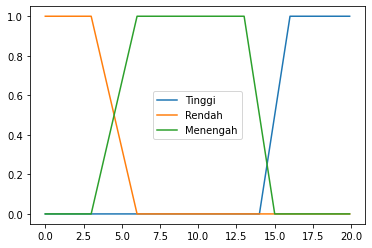

In [ ]:
#Desain Penghasilan
plotGrafik = np.arange(0, 20, 0.1)
plt.plot(plotGrafik,[penghasilan_tinggi(x) for x in plotGrafik], label='Tinggi')
plt.plot(plotGrafik,[penghasilan_rendah(x) for x in plotGrafik], label='Rendah')
plt.plot(plotGrafik,[penghasilan_menengah(x) for x in plotGrafik], label='Menengah')
plt.legend()

Desain Pengeluaran




In [ ]:
# Fungsi Pengeluaran sedikit
def pengeluaran_sedikit(y):
  if y <= 3:
    return 1
  elif y > 5:
    return 0
  else:
    return (5-y)/(5-3)

In [ ]:
# Fungsi Pengeluaran Normal
def pengeluaran_normal(y):
  if y <= 4 or y > 8:
    return 0
  elif y > 4 and y <= 6:
    return (y-4)/(6-4)
  elif y > 6 and y <= 7:
    return 1
  elif y > 7 and y <= 8:
    return (8-y)/(8-7)

In [ ]:
# Fungsi Pengeluaran banyak
def pengeluaran_banyak(y):
  if y <= 7:
    return 0
  elif y > 10:
    return 1
  else:
    return(y-7)/(10-7)

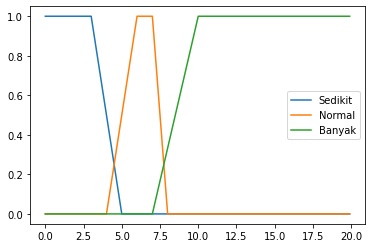

In [ ]:
#Desain Persentase Pengeluaran
plotGrafik = np.arange(0, 20 , 0.1)
plt.plot(plotGrafik,[pengeluaran_sedikit(x) for x in plotGrafik], label='Sedikit')
plt.plot(plotGrafik,[pengeluaran_normal(x) for x in plotGrafik], label='Normal')
plt.plot(plotGrafik,[pengeluaran_banyak(x) for x in plotGrafik], label='Banyak')
plt.legend()

## Fuzzifikasi

In [ ]:
fuzz_x = []
fuzz_y = []
for i in range(len(data_mahasiswa)):
  fuzz_x.append([data_mahasiswa[i][0], penghasilan_rendah(data_mahasiswa[i][1]), penghasilan_menengah(data_mahasiswa[i][1]), penghasilan_tinggi(data_mahasiswa[i][1])])
  fuzz_y.append([data_mahasiswa[i][0], pengeluaran_sedikit(data_mahasiswa[i][2]), pengeluaran_normal(data_mahasiswa[i][2]), pengeluaran_banyak(data_mahasiswa[i][2])])

## Inferensi

| PENGHASILAN | PENGELUARAN | HASIL |
| --- | --- | --- |
| TINGGI | BANYAK | DITOLAK  |
| TINGGI | NORMAL | DITOLAK |
| TINGGI | SEDIKIT | DITOLAK |
| MENENGAH | BANYAK | DITERIMA |
| MENENGAH | NORMAL | DIPERTIMBANGKAN |
| MENENGAH | SEDIKIT | DIPERTIMBANGKAN |
| RENDAH | BANYAK | DITERIMA |
| RENDAH | NORMAL | DITERIMA |
| RENDAH | SEDIKIT | DITERIMA |

In [ ]:
data_inferensi = []
for i in range(len(data_mahasiswa)):
  ditolak = []
  dipertimbangkan = []
  diterima = []

  ditolak.append(min(fuzz_x[i][3], fuzz_y[i][3]))
  ditolak.append(min(fuzz_x[i][3], fuzz_y[i][2]))
  ditolak.append(min(fuzz_x[i][3], fuzz_y[i][1]))

  
  diterima.append(min(fuzz_x[i][2], fuzz_y[i][3]))
  diterima.append(min(fuzz_x[i][1], fuzz_y[i][3]))
  diterima.append(min(fuzz_x[i][1], fuzz_y[i][2]))
  diterima.append(min(fuzz_x[i][1], fuzz_y[i][1]))

  dipertimbangkan.append(min(fuzz_x[i][2], fuzz_y[i][2]))
  dipertimbangkan.append(min(fuzz_x[i][2], fuzz_y[i][1]))

  hasil_ditolak = np.max(ditolak)
  hasil_diterima = np.max(diterima)
  hasil_dipertimbangkan = np.max(dipertimbangkan)
  data_inferensi.append([data_mahasiswa[i][0], hasil_ditolak , hasil_diterima, hasil_dipertimbangkan])

## Defuzzifikasi

In [ ]:
data_defuzzy = []
for i in range(len(data_mahasiswa)):
  data_defuzzy.append([data_mahasiswa[i][0], (data_inferensi[i][1]*55)+(data_inferensi[i][2]*95)+(data_inferensi[i][3]*75)/(data_inferensi[i][1]+data_inferensi[i][2]+data_inferensi[i][3])])
  

## Main Program

In [ ]:
def sorting(elem):
    return elem[1]
data_sorting = cp.deepcopy(data_mahasiswa)
data_sorting.sort(key=sorting, reverse = True)

In [ ]:
data_defuzzy.sort(key=sorting, reverse=True)
data_orang = []
data_nilai = []
for i in range (20):
  data_orang.append(data_defuzzy[i][0])
  data_nilai.append(data_defuzzy[i][1])
print('20 ID Mahasiswa layak yang mendapatkan bantuan biaya registrasi sebesar 50% adalah:',data_orang)
print()
print(' Dengan Nilai Seleksi',data_nilai)

20 ID Mahasiswa layak yang mendapatkan bantuan biaya registrasi sebesar 50% adalah: [33, 38, 46, 49, 50, 69, 79, 94, 99, 65, 16, 47, 66, 41, 52, 62, 13, 81, 11, 76]

 Dengan Nilai Seleksi [95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 89.77500000000003, 88.0333333333333, 88.0333333333333, 88.0333333333333, 84.19999999999999, 81.38333333333334, 80.27499999999998, 78.0, 77.90000000000003, 76.46666666666665, 75.56410256410257]


In [ ]:
data_na= pd.DataFrame(np.asarray(data_orang), columns=["id"])
data_na.to_excel("Bantuan.xls", index=False)
files.download('Bantuan.xls')

,id
0,33
1,38
2,46
3,49
4,50
5,69
6,79
7,94
8,99
9,65
